# Customer Segmentation using K-Means Clustering


# What is Customer Segmentation?

Customer segmentation is a way of dividing your customers into groups based on common characteristics. This helps you understand them better and target them more effectively with your marketing strategies.

As the owner of a supermarket mall, you want to figure out which of your customers are the most valuable and likely to respond positively to your marketing efforts. By understanding your customers better, you can create specific marketing strategies that will attract and keep these valuable customers, making your business more successful.

Customer ID: A unique number for each customer.

Age: How old they are.

Gender: Whether they are male or female.

Annual Income: How much money they make in a year.

Spending Score:Spending Score is a number that you assign to each customer based on their shopping behavior at your mall. 

# What is KMeans Clustering?

KMeans is a technique used to group similar items together. Here, we will use it to group customers with similar characteristics. These groups (or clusters) will help us identify patterns in customer behavior.

# Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Data Collection and Processing

In [2]:
data=pd.read_csv("Mall_Customers.csv")


In [3]:
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There is no missing value occur

# Choosing the Annual Income Column & Spending Score Column

In [6]:
X=data.iloc[:,[3,4]].values

In [7]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

# Choosing the number of clusters

WCSS/Inertia-Within cluster sum of squares (Sum of the squared distance between each member of the cluster and its centroid)

Formula=Σdistance(Pi,c1)^2 + Σdistance(Pi,c1)^2 

Inertia-Measaures How tightly grouped the datapoints are within the clusters

Elbow Method-Help us to figure out how many clusters we should use for the best grouping.We create multiple k-means model with different values of k.For each model,we calculate the inertia which measure how tightly grouped the datapoints are within their clusters.we plot inertia for each model on the graph,number of clusters on X-axis,inertia on y_axis.The plot typhically shows a sharp decrese in inertia as the number of clusters increase

In [10]:
# Finding wcss value for different number of clusters(Create 10 cluster to find which no.of.cluster has minimum wcss score)
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\User\.android\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


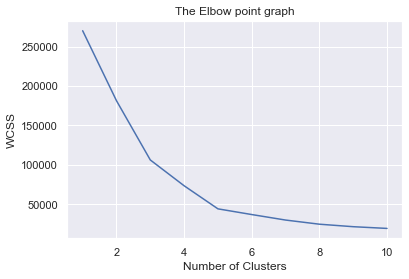

In [11]:
#PLot the Elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow point graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


When looking at the elbow graph, there are two noticeable "elbow" points: one at 3 and another at 5. We choose the point at 5 because, after this point, there are no significant drops in the graph.

# Optimum Number of Clusters=5

Training the K-Means Clustering Model

In [12]:
 kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
#  return a label for each data point based on their clusters
Y=kmeans.fit_predict(X)
print(Y)
    

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In the above case, the label represents which data points belong to their respective clusters.

# Visualizing the clusters

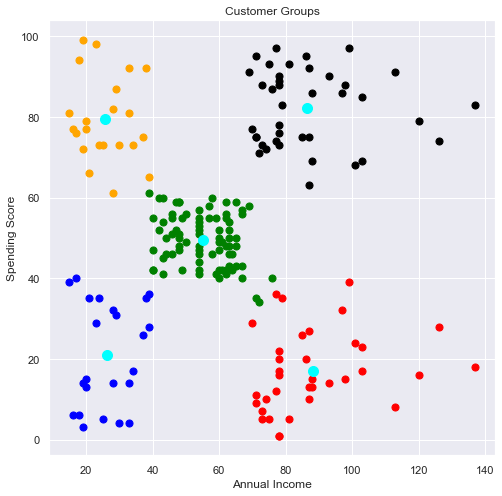

In [23]:
# plotting all the clusters and their centroids
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='red',label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='blue',label='Cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='orange',label='Cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='black',label='Cluster 5')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='Centroids')
plt.title("Customer Groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

The orange group has low income but a good spending score.

The blue group has low income and a low spending score.

The black group has high income and a high spending score.

The red group has high income but no spending score.

Based on this, the mall administration should give more offers and discounts to the blue and red groups.By doing this, they can buy more things and their spending scores should increase.


In [24]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [25]:
kmeans.cluster_centers_[:,0]

array([55.2962963 , 88.2       , 26.30434783, 25.72727273, 86.53846154])

In [26]:
kmeans.cluster_centers_[:,1]

array([49.51851852, 17.11428571, 20.91304348, 79.36363636, 82.12820513])

# Conclusion

Using k-means clustering, we identified five customer groups. Each group has different income levels and spending scores. This helps us understand customer behavior better. By targeting specific groups with offers, we can increase their spending and improve sales.